# Simple Linear Regression : Delivery Time.

## Business problem:

#### To build a simple Linear Regression Model to predict the delivery time using sorting time and select the best model using Python.

In [1]:
#Importing the required libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Importing the dataset

In [2]:
df = pd.read_csv("C:/Users/DELL/Desktop/ExcelR DS Assignments/Assignment 4 - Simple Linear Regression/delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### Checking Datatype:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Checking for null values:

In [5]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
df[df.duplicated()].shape

(0, 2)

In [7]:
df[df.duplicated()]

,Delivery Time,Sorting Time


### Performing EDA:

In [8]:
df.rename(columns={'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, inplace=True)
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### Plotting the data:

<AxesSubplot:xlabel='Delivery_Time', ylabel='Sorting_Time'>

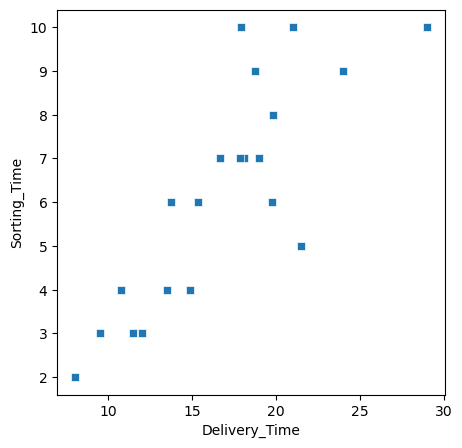

In [9]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Delivery_Time', y ='Sorting_Time', data = df, palette ='set1', marker=',')

### Correlation:

In [10]:
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<AxesSubplot:>

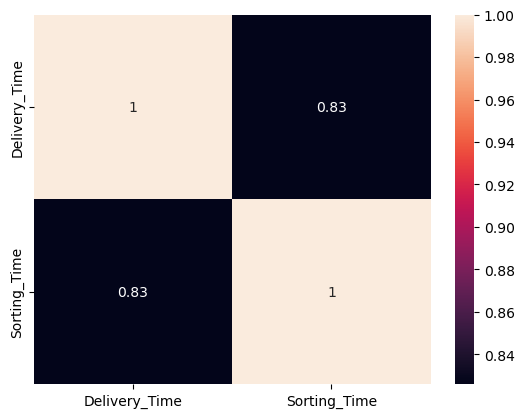

In [11]:
sns.heatmap(df.corr(),annot=True)

### Feature Engineering:

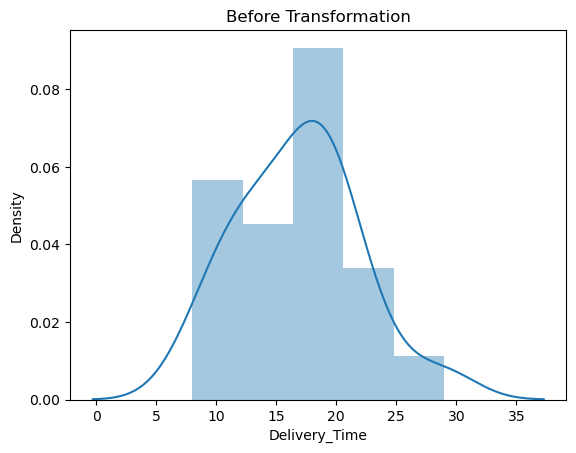

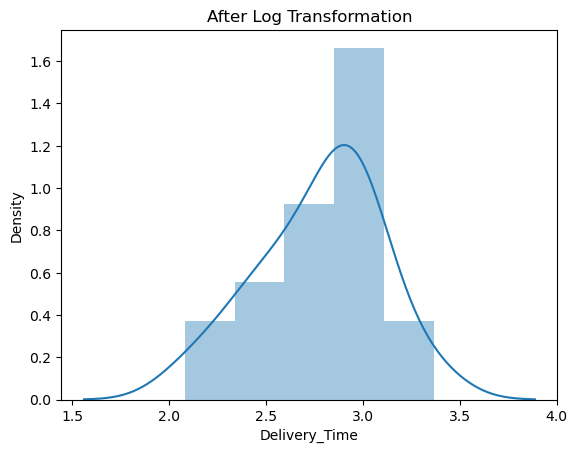

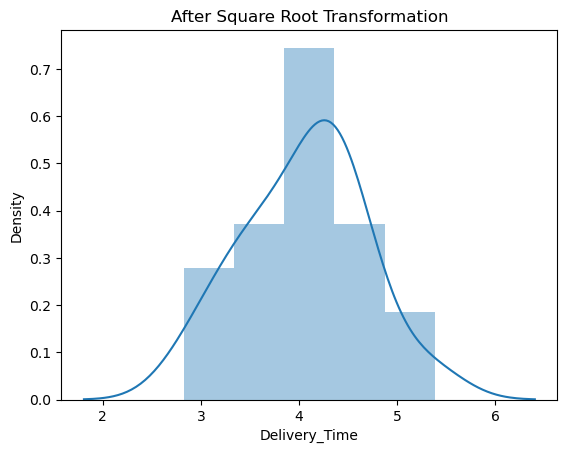

In [12]:
#Distplot for Delivery_Time Column:

sns.distplot(df['Delivery_Time'])
plt.title('Before Transformation')
plt.show()

sns.distplot(np.log(df['Delivery_Time']))
plt.title('After Log Transformation')
plt.show()

sns.distplot(np.sqrt(df['Delivery_Time']))
plt.title('After Square Root Transformation')
plt.show()

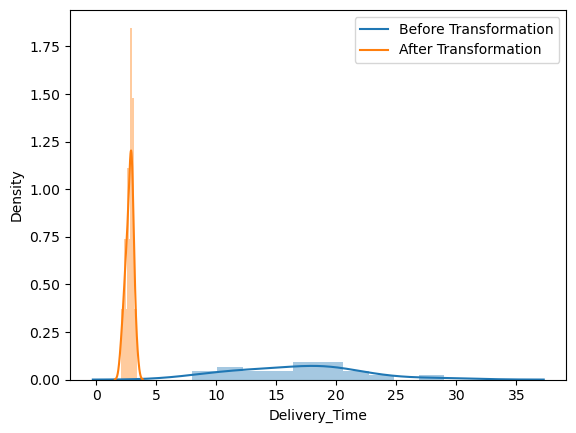

In [13]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Delivery_Time'], bins=10)
sns.distplot(np.log(df['Delivery_Time']), bins=10)
plt.legend(labels)
plt.show()

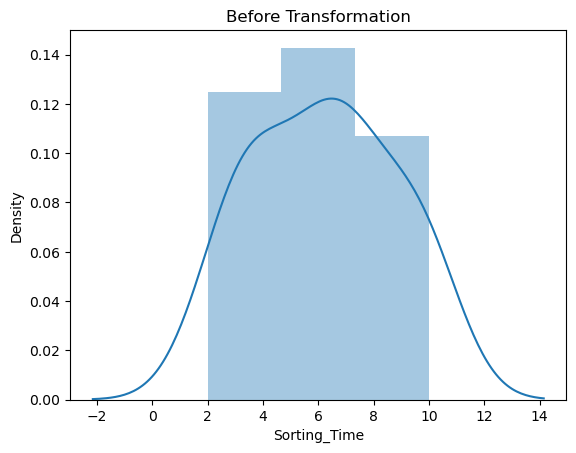

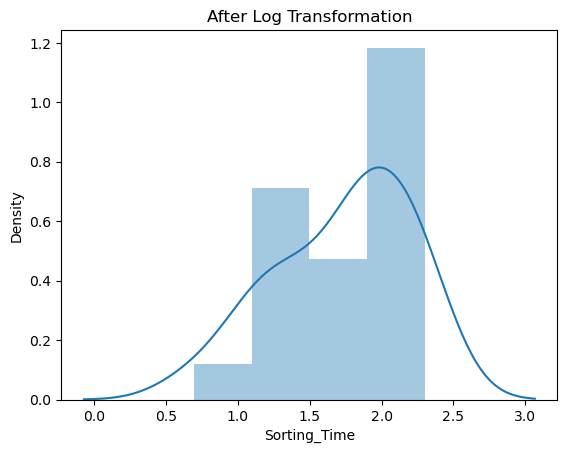

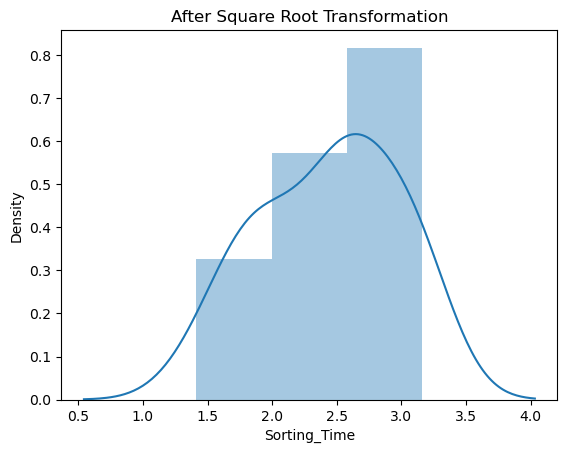

In [14]:
#Distplot for Sorting_Time Column:

sns.distplot(df['Sorting_Time'])
plt.title('Before Transformation')
plt.show()

sns.distplot(np.log(df['Sorting_Time']))
plt.title('After Log Transformation')
plt.show()

sns.distplot(np.sqrt(df['Sorting_Time']))
plt.title('After Square Root Transformation')
plt.show()

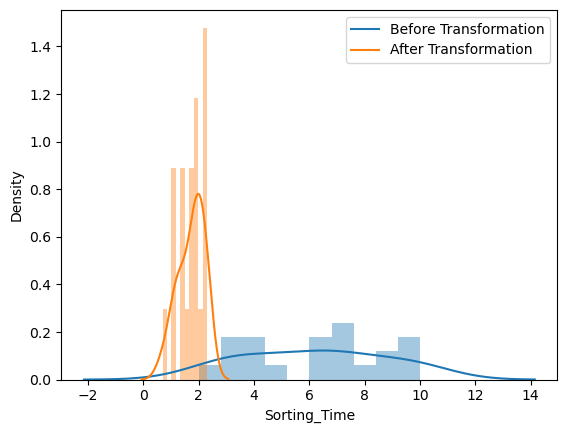

In [15]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Sorting_Time'],bins=10)
sns.distplot(np.log(df['Sorting_Time']),bins=10)
plt.legend(labels)
plt.show()

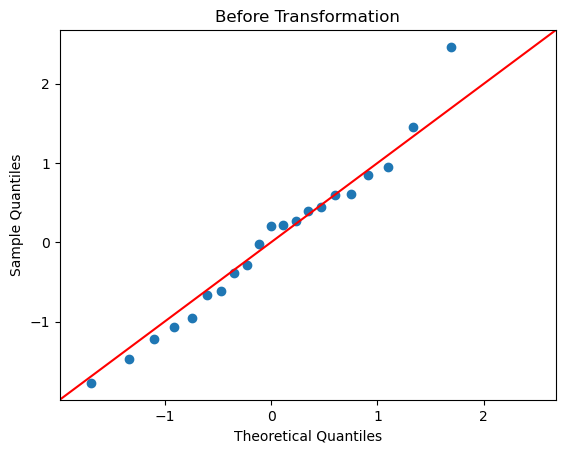

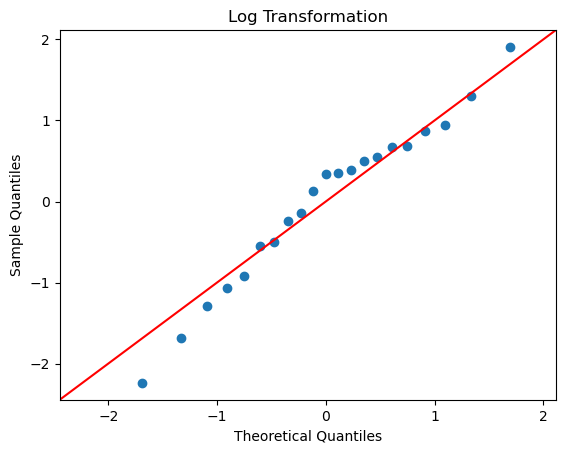

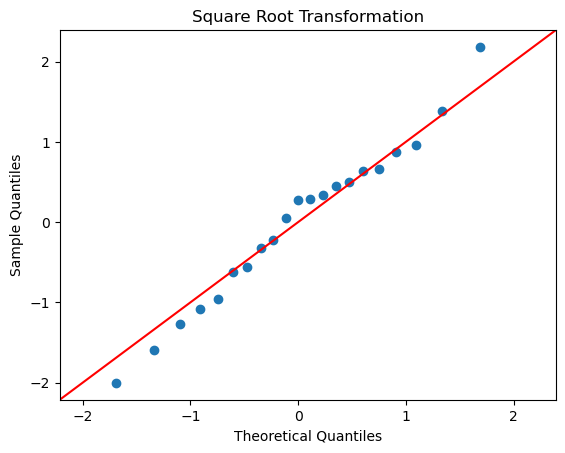

In [16]:
#QQ Plot for Delivery_Time Column:

sm.qqplot(df['Delivery_Time'], fit=True, line = '45')
plt.title('Before Transformation')
plt.show()

sm.qqplot(np.log(df['Delivery_Time']), fit=True, line='45')
plt.title('Log Transformation')
plt.show()

sm.qqplot(np.sqrt(df['Delivery_Time']), fit=True, line='45')
plt.title('Square Root Transformation')
plt.show()

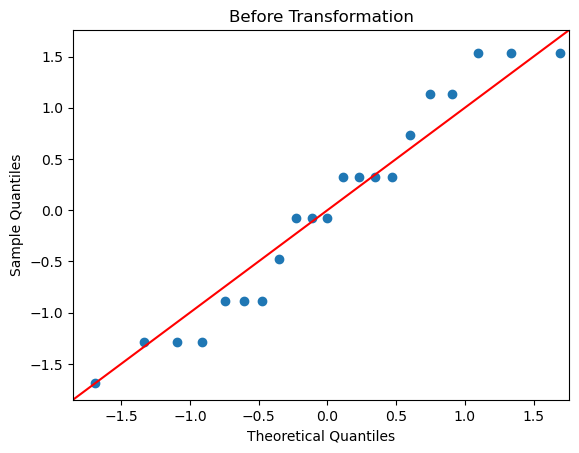

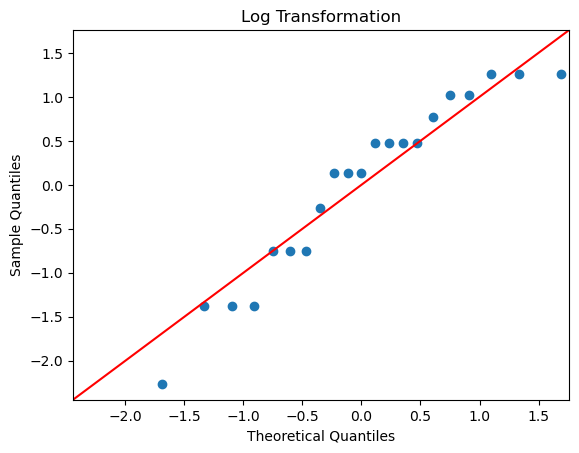

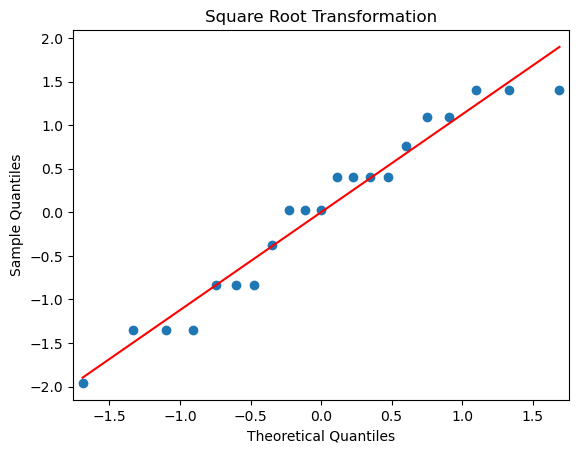

In [17]:
#QQ Plot for Sorting_Time Column: 

sm.qqplot(df['Sorting_Time'], fit=True, line = '45')
plt.title('Before Transformation')
plt.show()

sm.qqplot(np.log(df['Sorting_Time']), fit=True, line='45')
plt.title('Log Transformation')
plt.show()

sm.qqplot(np.sqrt(df['Sorting_Time']), fit=True, line='r')
plt.title('Square Root Transformation')
plt.show()

### Fitting a Linear Regression Model:

#### Using Ordinary Least Squares (OLS) Regression:

In [18]:
#OLS = Ordinary Least Squares

model = smf.ols("Delivery_Time ~ Sorting_Time", data= df).fit()

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

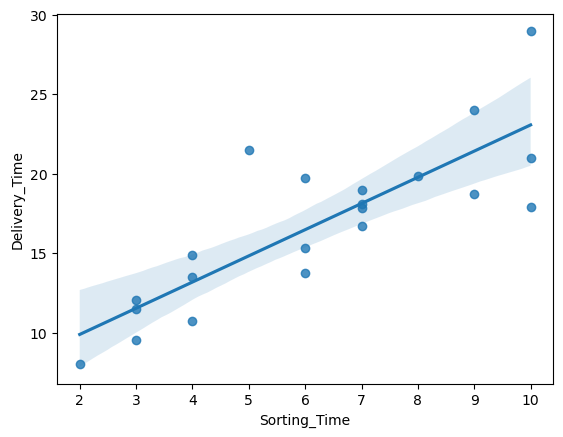

In [19]:
#To see the best fit line (which is as close as possible to as many points as possible)

sns.regplot(x='Sorting_Time',y='Delivery_Time',data=df)

**From this plot we can see that:**

1. There is a good correlation between the two variables.

2. The score is more than 0.8 and is a good score.

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           3.98e-06
Time:                        03:01:32   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As we can see that,**

The R-squared and Adjusted R-squared scores are still below 0.85 i.e, 0.68 and 0.66 respectively. Hence, we will try some other transformation to get a higher score.

### Square Root Transformation on Data:

In [21]:
model1 = smf.ols("np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)", data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Fri, 28 Jul 2023   Prob (F-statistic):           8.48e-07
Time:                            03:01:32   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As we can see that,**

The R-squared and Adjusted R-squared scores are still below 0.85 i.e, 0.72 and 0.71 respectively. Hence, we will try some other transformation to get a higher score.

### Logarithmic Transformation on Data:

In [22]:
model2 = smf.ols("np.log(Delivery_Time)~np.log(Sorting_Time)", data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Fri, 28 Jul 2023   Prob (F-statistic):           1.60e-07
Time:                           03:01:33   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As we can notice in the above model,**

The R-squared and Adjusted R-squared scores are highest scores than the previous model. Hence, we consider this model as a good model for prediction.

## Calculating the coefficients:

 #### **We know that:**
 
 ### Y = Beta 0 + (Beta 1 * X1) + e
  

### Calculating the Model Predictions:

In [23]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

#### B0 = 6.582734 (Intercept),

#### B1 = 1.649020 (Slope),

#### X1 = Independent data point,

#### e (error) = Vertical distance between the actual 'Delivery_Time' value & the 'Delivery_Time' fitted value

In [24]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


For Beta 0 (Intercept) : t-value = 3.823349 , p-value = 0.001147

For Beta1 (Sorting_Time) : t-value = 6.387447, p-value = 0.000004

Null Hypothesis - The Independent variable is not at all significantly related to the dependent values.

Alternate Hypothesis - The Independent variable is significantly related to the dependent variable.

For any variable, if p-value < 0.05, then we can consider that variable to be useful/significant to predict the dependent variable.

Here, the independent variable Sorting_Time is useful/significant to predict the dependent variable Delivery_Time

In [25]:
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

That means 68.22% of variation in the dependent variable is explained by the given independent variable.

## Test for Normality of Residuals (Q-Q Plot)

In [26]:
import statsmodels.api as sm

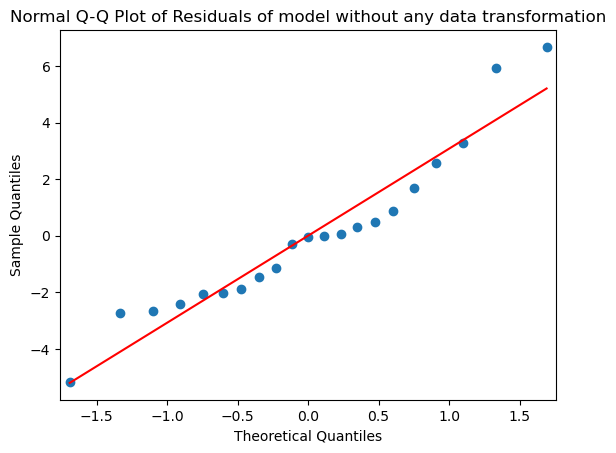

In [27]:
#For the model without transformation:

qqplot=sm.qqplot(model.resid,line='r') # line=45 to draw the diagonal line
plt.title('Normal Q-Q Plot of Residuals of model without any data transformation')
plt.show()

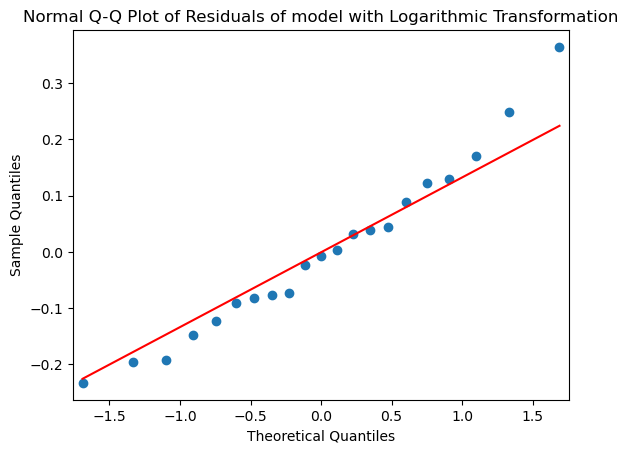

In [28]:
#For the Log-transformed Model:

qqplot=sm.qqplot(model2.resid,line='q') # line=45 to draw the diagonal line
plt.title('Normal Q-Q Plot of Residuals of model with Logarithmic Transformation')
plt.show()

As we can see in the above plots:

**1**. **Both** the **models** have **slightly different plots**.

**2**. The **First model** is **Right-Skewed** and **doesn't follow Normal Distribution**.

**3**. The **Second model** after Logarithmic Transformation **follows Normal Distribution** with **Less Skewness** than the First model.

## Residual Plot For Homoscedasticity

In [29]:
def get_standardised_values(vals):
    return (vals-vals.mean())/vals.std()

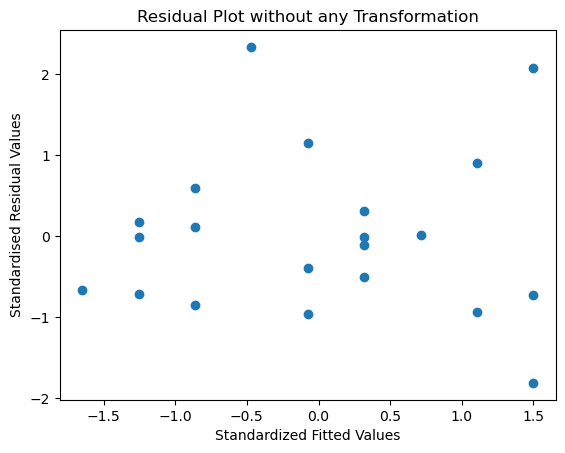

In [30]:
plt.scatter(get_standardised_values(model.fittedvalues),get_standardised_values(model.resid))
plt.title('Residual Plot without any Transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardised Residual Values')
plt.show()

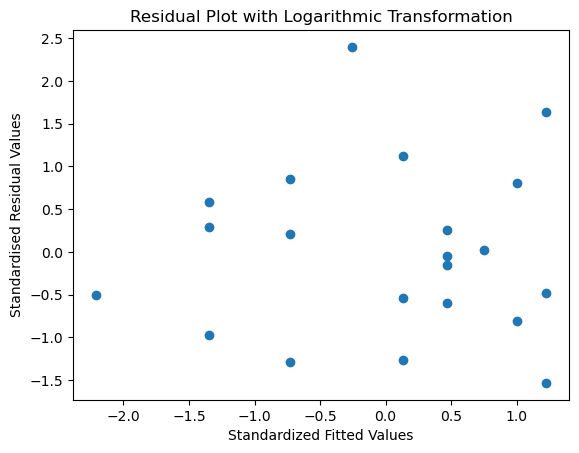

In [31]:
plt.scatter(get_standardised_values(model2.fittedvalues),get_standardised_values(model2.resid))
plt.title('Residual Plot with Logarithmic Transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardised Residual Values')
plt.show()

From the above plots, we can conclude that:

1. **Both** the **models** have **Homoscedacity**.

2. The **Residual** and **Fitted values do not share any pattern**.

3. Hence, there is **no relation between the Residual and the Fitted value**. It is **randomly distributed**.

### Model Validation:

Comparing different Models with respect to their Roon Mean Squared Errors,
we will analyze **Mean Squared Error**(**MSE**) or **Root Mean Squared Error**(**RMSE**).

#### For model without any transformation:

In [32]:
df_wt = df.copy()

df_wt['Error'] = model.resid
df_wt['Error_Squared'] = (model.resid)**2

Mean_Squared_Error = df_wt['Error_Squared'].mean()
print("MSE : Model without any transformation:",Mean_Squared_Error)

Root_Mean_Squared_Error = np.sqrt(Mean_Squared_Error)
print("RMSE : Model without any transformation:",Root_Mean_Squared_Error)

MSE : Model without any transformation: 7.793311548584062
RMSE : Model without any transformation: 2.7916503270617654


#### For model with Square Root Transformation:

In [33]:
df1 = df.copy()
df1 = np.sqrt(df)

df1['Error'] = model1.resid
df1['Error_Squared'] = (model1.resid)**2

Mean_Squared_Error_model1 = df1['Error_Squared'].mean()
print("MSE : Model1 (SQRT Transformation):",Mean_Squared_Error_model1)

Root_Mean_Squared_Error_model1 = np.sqrt(Mean_Squared_Error_model1)
print("RMSE : Model1 (SQRT Transformation):",Root_Mean_Squared_Error_model1)

MSE : Model1 (SQRT Transformation): 0.10106690385613766
RMSE : Model1 (SQRT Transformation): 0.31791021351340326


#### For model with Logarithmic Transformation:

In [34]:
df2 = df.copy()
df2 = np.log(df)

df2['Error'] = model2.resid
df2['Error_Squared'] = (model2.resid)**2

Mean_Squared_Error_model2 = df2['Error_Squared'].mean()
print("MSE : Model2 (Log Transformation):",Mean_Squared_Error_model2)

Root_Mean_Squared_Error_model2 = np.sqrt(Mean_Squared_Error_model2)
print("RMSE : Model2 (Log Transformation):",Root_Mean_Squared_Error_model2)

MSE : Model2 (Log Transformation): 0.02197305811248814
RMSE : Model2 (Log Transformation): 0.14823312083501494


In [35]:
data={ 'Model':Root_Mean_Squared_Error,'Model1':Root_Mean_Squared_Error_model1,'Model2' : Root_Mean_Squared_Error_model2}
min(data, key=data.get)

'Model2'

**Model2** has the **minimum RMSE value** and **highest Adjusted R-squared score**. Hence, we are going to **use Model2 to predict** our values.

**Model2** is the model where we did **Log transformation** on both **Dependent variable as well as on Independent variable**.

### Predicting values from model with Log Transformation:

In [36]:
df_new = pd.DataFrame()
df_new['Sorting_Time']= df['Sorting_Time']
df_new['Delivery_Time']=df['Delivery_Time']
df_new['Predicted_Delivery_Time'] = np.exp(model2.predict(df_new['Sorting_Time']))
df_new

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593
